# Machine learning model for weather prediction 

This is an upgrade to the previous model. More parameters and targets have been added.

Dataset: We will generate a synthetic Dataset.csv file. This will help us to train and use the ML Model.

First, lets understand our problem statement.
ML MODEL FOR predicting Weather. Will it rain tomorrow? yes or no (1 or 0)
what are the parameters we are considering? 
1. Temperature
2. Season
3. humidity
4. Does it look cloudy or not.
5. Windspeed.
6. Atmospheric pressure.
7. Region

The new outputs are heavy rain, light rain, snow fall, hail storm, thunderstorm.

>Temperature,Season,Humidity,Cloudy,Windspeed,AtmosphericPressure,Region,WeatherCondition
28,Summer,65,1,15,1012,North,No Rain
31,Summer,60,0,10,1010,North,No Rain
24,Monsoon,85,1,20,1005,South,Heavy Rain
22,Monsoon,90,1,25,1003,South,Heavy Rain
26,Post-Monsoon,75,1,15,1011,East,Light Rain
20,Winter,70,0,5,1020,West,No Rain
25,Summer,60,0,10,1013,North,No Rain
23,Monsoon,80,1,20,1006,South,Heavy Rain
21,Monsoon,88,1,15,1004,South,Heavy Rain
27,Post-Monsoon,70,0,10,1012,East,No Rain
19,Winter,65,0,5,1021,West,No Rain
29,Summer,55,0,15,1010,North,No Rain
24,Monsoon,82,1,20,1005,South,Heavy Rain
19,Winter,68,1,5,1022,West,No Rain
26,Post-Monsoon,65,1,10,1011,East,Light Rain
30,Summer,60,0,12,1010,North,Thunderstorm
22,Winter,75,1,8,1023,West,Snow Fall
25,Monsoon,85,1,18,1007,South,Hail Storm
28,Post-Monsoon,70,0,14,1012,East,Light Rain
21,Winter,68,1,6,1020,West,No Rain

Now lets import some libraries

In [19]:
import pandas as pd #Pandas is for Data processing. 
import numpy as np #Numpy is for numerical calculations.
import matplotlib.pyplot as plt #plotting and visually understanding the data.
from sklearn.model_selection import train_test_split #split the data into testing and training set
from sklearn.preprocessing import LabelEncoder #converts things like "monsoon", "summer" into numeric labels like 0 1 2
# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures

# Feature Selection
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel


In [20]:
# Linear models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

# Tree-based models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Ensemble models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor

# Support Vector Machines
from sklearn.svm import SVC, SVR

# Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Decomposition
from sklearn.decomposition import PCA, NMF

# Neural Network
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Gaussian Processes
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor

# Model Selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

# Pipeline
from sklearn.pipeline import Pipeline

In [21]:

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

What next?
-Load and prepare the dataset using pandas.
-Visualize the data with matplotlib to get an understanding of patterns.
-Preprocess the data: Use LabelEncoder or One-Hot Encoding for categorical variables.Scale numerical data using MinMaxScaler.
-Split the dataset into training and testing using train_test_split.
-Train the model using either Logistic Regression or SVM.
-Evaluate the model using classification_report to assess its performance.

now lets understand the Dataset.


In [22]:
df = pd.read_csv("Ndataset.csv")
display(df)


,Temperature,Season,Humidity,Cloudy,Windspeed,AtmosphericPressure,Region,WeatherCondition
0,28,Summer,65,1,15,1012,North,No Rain
1,31,Summer,60,0,10,1010,North,No Rain
2,24,Monsoon,85,1,20,1005,South,Heavy Rain
3,22,Monsoon,90,1,25,1003,South,Heavy Rain
4,26,Post-Monsoon,75,1,15,1011,East,Light Rain
5,20,Winter,70,0,5,1020,West,No Rain
6,25,Summer,60,0,10,1013,North,No Rain
7,23,Monsoon,80,1,20,1006,South,Heavy Rain
8,21,Monsoon,88,1,15,1004,South,Heavy Rain
9,27,Post-Monsoon,70,0,10,1012,East,No Rain


But i thought i wanted to make Summer monsoon, post monsoon and winter into numeric labels?


In [23]:
encoder = LabelEncoder()
df['Season'] = encoder.fit_transform(df['Season'])
df['Region'] = encoder.fit_transform(df['Region'])
df['WeatherCondition'] = encoder.fit_transform(df['WeatherCondition'])

# No rain = 3
# Heavy Rain = 1
# Light Rain = 2
# Thunderstorm = 5
# Snow Fall = 4
# hail storm = 0

In [24]:
display(df)

,Temperature,Season,Humidity,Cloudy,Windspeed,AtmosphericPressure,Region,WeatherCondition
0,28,2,65,1,15,1012,1,3
1,31,2,60,0,10,1010,1,3
2,24,0,85,1,20,1005,2,1
3,22,0,90,1,25,1003,2,1
4,26,1,75,1,15,1011,0,2
5,20,3,70,0,5,1020,3,3
6,25,2,60,0,10,1013,1,3
7,23,0,80,1,20,1006,2,1
8,21,0,88,1,15,1004,2,1
9,27,1,70,0,10,1012,0,3


In [25]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the relevant columns
df[['Temperature', 'Humidity', 'Windspeed','AtmosphericPressure']] = scaler.fit_transform(df[['Temperature', 'Humidity', 'Windspeed','AtmosphericPressure']])


df.to_csv("Ndatasetn.csv")
display(df)


,Temperature,Season,Humidity,Cloudy,Windspeed,AtmosphericPressure,Region,WeatherCondition
0,0.750000,2,0.285714,1,0.50,0.45,1,3
1,1.000000,2,0.142857,0,0.25,0.35,1,3
2,0.416667,0,0.857143,1,0.75,0.10,2,1
3,0.250000,0,1.000000,1,1.00,0.00,2,1
4,0.583333,1,0.571429,1,0.50,0.40,0,2
5,0.083333,3,0.428571,0,0.00,0.85,3,3
6,0.500000,2,0.142857,0,0.25,0.50,1,3
7,0.333333,0,0.714286,1,0.75,0.15,2,1
8,0.166667,0,0.942857,1,0.50,0.05,2,1
9,0.666667,1,0.428571,0,0.25,0.45,0,3


OK so now, we have converted The labels to numerical.
Now lets plot the graph
rain vs other factors.

In [26]:
X = df[['Temperature','Season','Humidity','Cloudy','Windspeed','AtmosphericPressure','Region']]
Y = df['WeatherCondition']


but wait, we didnt normalise the data yet. 

Now lets try plotting


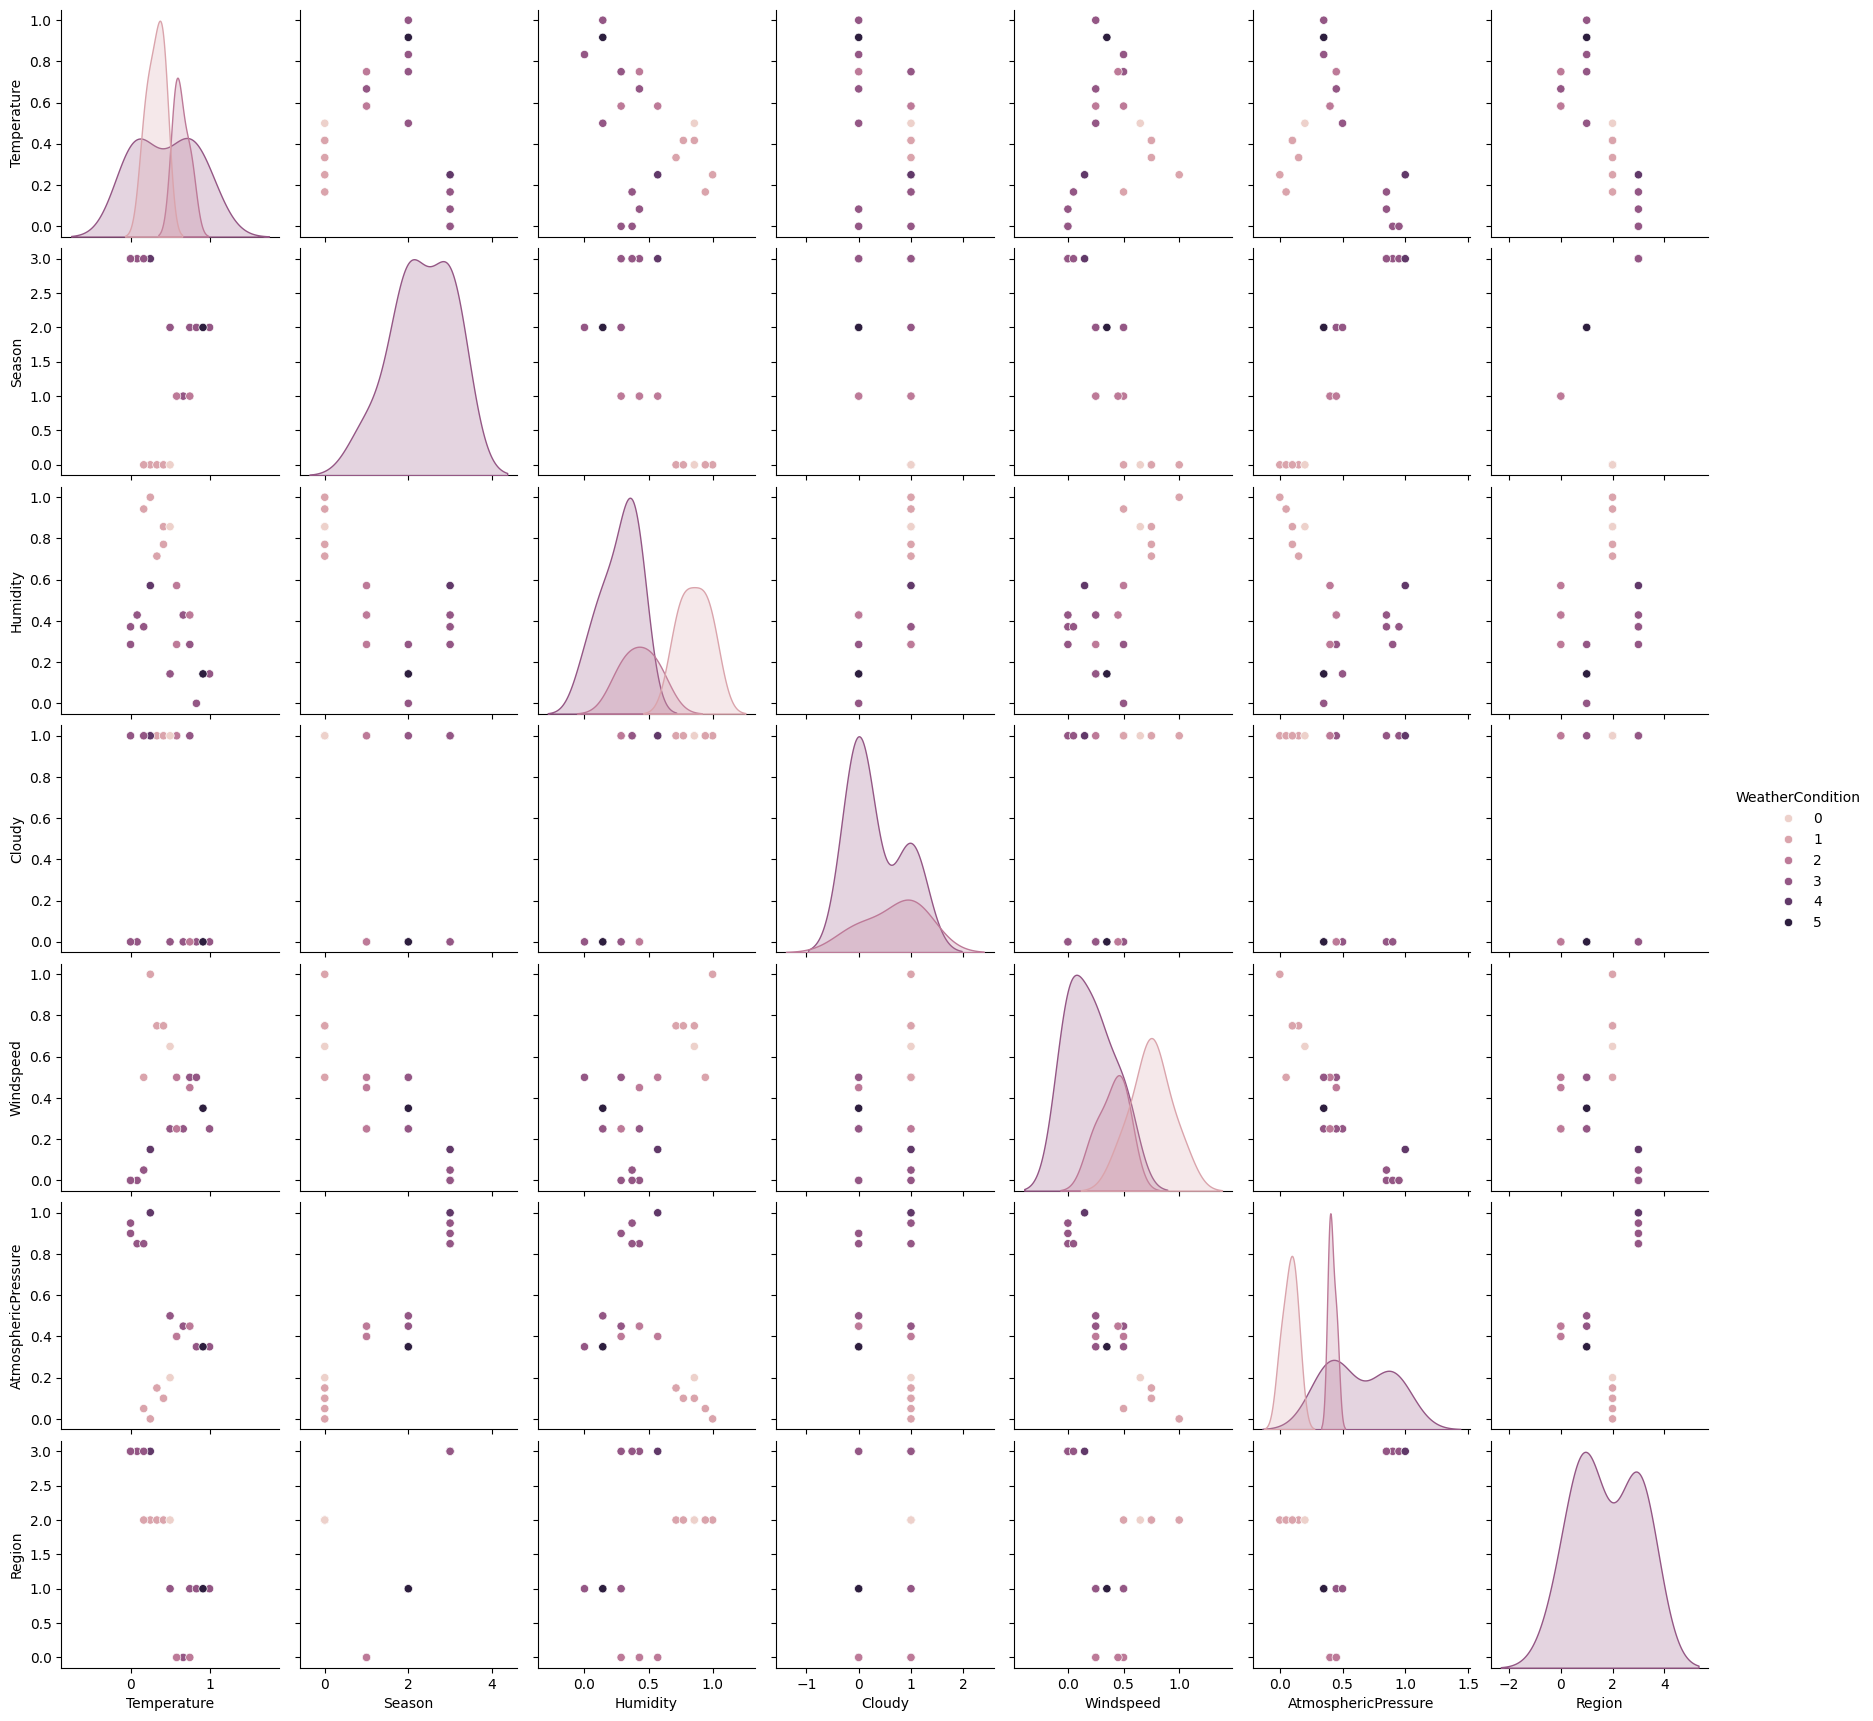

In [27]:
import seaborn as sns
sns.pairplot(df, hue='WeatherCondition', vars=['Temperature','Season','Humidity','Cloudy','Windspeed','AtmosphericPressure','Region'])
plt.show()

Now lets split the data into training and testing Data

In [28]:
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#test_size is for splitting. basically 0.2 means 20% of data will be used for testing.

Now we have to train the model for different weather conditions. Ie. No Rain, Light Rain, Heavy Rain, Snow Fall, Hail Storm, Thunderstorm. 
We need to implement multi class classsification.

# Support Vector Classifier

In [29]:
model = SVC()
model.fit(X_train,Y_train)
predict = model.predict(X_test)
print(X_test)
print(predict)
print(classification_report(Y_test, model.predict(X_test)))

    Temperature  Season  Humidity  ...  Windspeed  AtmosphericPressure  Region
0      0.750000       2  0.285714  ...       0.50                 0.45       1
17     0.500000       0  0.857143  ...       0.65                 0.20       2
15     0.916667       2  0.142857  ...       0.35                 0.35       1
1      1.000000       2  0.142857  ...       0.25                 0.35       1

[4 rows x 7 columns]
[3 1 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           3       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.33      0.50      0.40         4



C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

# Support Vector Regression

# Decision Tree Regression

In [36]:
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train,Y_train)
predictDTR = modelDTR.predict(X_test)
print(classification_report(Y_test, modelDTR.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         0
         3.0       0.67      1.00      0.80         2
         5.0       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.33      0.50      0.40         4



C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

# Decision Tree Classifier

# KNN Classifier

In [32]:
modelKNNC = KNeighborsClassifier()
modelKNNC.fit(X_train,Y_train)
predictKNN = modelKNNC.predict(X_test)

print(classification_report(Y_test, modelKNNC.predict(X_test)))  


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.10      0.10      0.10         4
weighted avg       0.25      0.25      0.25         4



C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

# KNN regressor

In [ ]:
modelKNNR = KNeighborsRegressor()
modelKNNR.fit(X_train,Y_train)
predictKNNR = modelKNNR.predict(X_test)
#  Classification metrics can't handle a mix of multiclass and continuous targets

Classification metrics (like accuracy, precision, recall, F1 score) are meant for discrete classes (e.g., labels like "yes", "no", "maybe"), but when you have continuous targets (like real-valued numbers or regression outputs), they don't directly apply.

If you're dealing with mixed targets, where you have both multi-class and continuous targets, you should treat each type of target differently. Here's how you can handle each type of target properly:

1. Multi-Class Targets (Categorical Classes):
For categorical targets like "yes", "no", "maybe", etc., you can use classification metrics. These include:

Accuracy: Measures how many predictions are correct.
Precision, Recall, F1 Score: These can be used for each class or averaged (macro, weighted, or micro averaging).
Confusion Matrix: Gives you detailed counts of true positives, false positives, etc., for each class.
2. Continuous Targets (Regression):
For continuous targets (numerical data), you need to use regression metrics. These include:

Mean Absolute Error (MAE): Average of the absolute differences between predicted and true values.
Mean Squared Error (MSE): Average of the squared differences.
Root Mean Squared Error (RMSE): Square root of MSE.
R-squared (R²): Measures how well the regression model explains the variance of the data.